<a href="https://colab.research.google.com/github/kvakhil/Machine-Learning-CS-545/blob/main/Multilayered_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A2.2-Multilayered-Neural-Network" data-toc-modified-id="A2.2-Multilayered-Neural-Network-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A2.2 Multilayered Neural Network</a></span><ul class="toc-item"><li><span><a href="#Required-Part-One" data-toc-modified-id="Required-Part-One-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Required Part One</a></span></li><li><span><a href="#Required-Part-Two" data-toc-modified-id="Required-Part-Two-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Required Part Two</a></span></li></ul></li><li><span><a href="#Grading" data-toc-modified-id="Grading-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Grading</a></span></li><li><span><a href="#Check-In" data-toc-modified-id="Check-In-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check-In</a></span></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Extra Credit</a></span></li></ul></div>

# A2.2 Multilayered Neural Network

* 2.2: *Added example output in Section 1.1.*
* 2.1: *Added A2grader.tar and details on how to rename the functions for the use of the asymmetric sigmoid activation function.*

You will implement a set of functions for training and testing a multilayered neural network to predict continuous-valued target values.  This assignment provides an implementation of the functions for a neural network with one hidden layer.  You must modify the functions to allow any number of hidden layers, each with any number of units.

The required functions are:

* `add_ones(X)`: Given an $N \times D$ matrix of inputs, prepend column of 1's and return the resulting $N \times D+1$ matrix.
* `make_weights(n_inputs, n_hiddens, n_outputs):` Given integers `n_inputs`, `n_hiddens` and `n_outputs`, create weight matrices `V` for the hidden layer and `W` for the output layer.
* `forward(Xst, V, W)`: Given standardized input matrix `Xst` and weight matrices `V` and `W`, calculate the output of all layers and return the outputs of the hidden layer, `Z` as an $N \times H$ matrix, where $H$ is the number of hidden units, and the outputs of the output layer `Y` as an $N \times K$ matrix, where $K$ is the number of output values for each sample. 
* `backward(Xst, Tst, V, W)`: Given standardized input matrix `Xst`, standardized target matrix `Tst`, and weight matrices `V` and `W`,, calculate the gradient of the mean squared error with respect to the weights `V` and `W`, returning a tuple of both gradients, with respect to `V` as the first element and with respect to `W` as the second element.
* `train_sgd(X, T, V, W, learning_rate, n_epochs):` Given input and target matrices `X` and `T`, weight matrices `V` and `W`, a learning_rate and the number of epochs to train, update the weights for `n_epochs` iterations using the gradient of the mean squared over the whole data set in `X` and `T`  and return the resulting new weight matrices `V` and `W`, the standardization parameters, and the list of RMSE training errors, one per epoch.
* `use(X, V, W, stand_parms):` Calculate outputs of both layers after standardizing input `X`. Return outputs of hidden layer, and unstandardized output of output layer.
* `rmse(Y, T):` Return the RMSE between `Y` and `T`, both of which are not standardized.
* `calc_standardize_parameters(X, T)`: calculate and return as a dictionary the column means and standard deviations of `X` and `T`.
* `standardize_X(X, stand_parms)`: return standardized `X`.
* `standardize_T(T, stand_parms)`: return standardized `T`.
* `unstandardize_X(Xst, stand_parms)`: return unstandardized `X` (probably not needed).
* `unstandardize_T(Tst, stand_parms)`: return unstandardized `T`, will be needed by `use`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def add_ones(X):
    return np.insert(X, 0, 1, axis=1)

In [ ]:
def calc_standardize_parameters(X, T):
    Xmeans = X.mean(axis=0)
    Xstds = X.std(axis=0)
    Tmeans = T.mean(axis=0)
    Tstds = T.std(axis=0)
    return {'Xmeans': Xmeans, 'Xstds': Xstds,
            'Tmeans': Tmeans, 'Tstds': Tstds}

def standardize_X(X, stand_parms):
    return (X - stand_parms['Xmeans']) / stand_parms['Xstds']


def unstandardize_X(Xst, stand_parms):
    return Xst * stand_parms['Xstds'] + stand_parms['Xmeans']


def standardize_T(T, stand_parms):
    return (T - stand_parms['Tmeans']) / stand_parms['Tstds']


def unstandardize_T(Tst, stand_parms):
    return Tst * stand_parms['Tstds'] + stand_parms['Tmeans']

Here is a test of the functions.  We fit a neural network to simple one-dimensional data.

## Required Part One

The changes you must implement are specified here.  We recommend that you copy the above code cells and paste them below, then edit them appropriately.

You will implement a set of functions for training and testing a multilayered neural network to predict continuous-valued target values.  This assignment provides an implementation of the functions for a neural network with one hidden layer.  You must modify the functions to allow any number of hidden layers, each with any number of units.

The required functions are:

* `make_weights(n_inputs, n_hiddens_list, n_outputs):` Given integers `n_inputs`, list of `n_hiddens`, one integer per hidden layer, and `n_outputs`, create and return list of weight matrices, one for each layer.
* `forward(Xst, Ws)`: Given standardized input matrix `X` and list of weight matrices `Ws`, calculate the output of all layers and return a list of the outputs of each layer.
* `backward(Xst, Tst, Ws)`: Given standardized input matrix `X`, standardized target matrix `T`, and list of weight matrices `Ws`, calculate the gradient of the mean squared error with respect to the weights in each layer, returning a tuple or list of all gradient matrices.
* `train_sgd(X, T, Ws, learning_rate, n_epochs):` Given input and target matrices `X` and `T`, liist of all weight matrices `Ws`, a learning_rate and the number of epochs to train, update the weights for `n_epochs` iterations using the gradient of the mean squared over the whole data set in `X` and `T`  and return the list of resulting new weight matrices, the standardization parameters, and the list of RMSE training errors, one per epoch.
* `use(X, Ws, stand_parms):` Calculate outputs of all layers after standardizing input `X`. Return list of outputs of each hidden layer, and unstandardized output of output layer.

In [ ]:
def make_weights(n_inputs, n_hiddens_list, n_outputs):
    # Create and return weight matrices, V and W, for the hidden and output layers.
    # Initialize them to uniformly-distribted random values between -sqrt(n_in) and +sqrt(n_in)
    weights_list=[]
    for n_hiddens in n_hiddens_list:
      weights_list.append(np.random.uniform(-1, 1, size=(1 + n_inputs, n_hiddens))/ np.sqrt(n_inputs + 1))
      n_inputs=n_hiddens
    # V = np.random.uniform(-1, 1, size=(1 + n_inputs, n_hiddens)) / np.sqrt(n_inputs + 1)
    weights_list.append(np.random.uniform(-1, 1, size=(1 + n_inputs, n_outputs)) / np.sqrt(n_inputs + 1))
    return weights_list

In [ ]:
def forward(Xst, Ws):
    # Calculate the outputs, Z, of all hidden units, given all input samples in X.
    output_list=[]
    for W in Ws:
      Z = np.tanh(add_ones(Xst) @ W)
      output_list.append(Z);
      Xst=Z
    output_list.pop()
    # Calculate the outputs, Y, of all output units, given all outputs of the hidden units.
    Yst = add_ones(output_list[-1]) @ Ws[-1]
    output_list.append(Yst)
    return output_list


In [ ]:
def backward(Xst, Tst, Ws):
    n_samples = Xst.shape[0]
    n_outputs = Tst.shape[1]
    # Calculate the outputs of both layers.
    outs= forward(Xst, Ws)
    gradients=[]
    # Calculate the delta value for the output layer. Divide by n_samples * n_outputs
    # because we are calculating the gradient of the mean sqauared error with respect to weights.
    delta = -(Tst -  outs[-1]) /  (n_samples * n_outputs)
    # The gradient of the mean squared error with respect to the output layer weights W.
    gradient_W = add_ones(outs[-2]).T @ delta
    gradients.append(gradient_W)
    # Back-propagate the delta value from the output layer, through the output layer weights,
    # to the hidden units.  Multiply the result by the derivative of the hidden units'
    # activation function, tanh
    for i in range(len(Ws)-2):
      delta = (delta @ Ws[-1*(i+1)][1:, :].T) * (1 - outs[-1*(i+2)] ** 2)
    # The gradient of the mean squared error with respect to the hidden layer weights, V.
      gradient_V = add_ones(outs[-1*(i+3)]).T @ delta
      gradients.append(gradient_V)

    delta = (delta @ Ws[1][1:, :].T) * (1 - outs[0] ** 2)
    gradient_V = add_ones(Xst).T @ delta
    gradients.append(gradient_V)
    # Return both gradients.  Each should be the same shape as the respective weight matrices.
    gradients.reverse()
    return gradients

In [ ]:
def train_sgd(X, T, Ws, learning_rate, n_epochs):
    # Store standardization parameters in dictionary stand_parms.
    stand_parms = calc_standardize_parameters(X, T)
    # Standardize X and T.
    Xst = standardize_X(X, stand_parms)
    Tst = standardize_T(T, stand_parms)

    error_trace = []

    # Update weights for n_epochs passes through the training data
    for epoch in range(n_epochs):

        # Calculate the gradients of the mean squared error with respect to each weight matrix.
        gradient_list = backward(Xst, Tst, Ws)

        
        # Update the values in each weight matrix using SGD.
        for i in range(len(gradient_list)):
          Ws[i] -= learning_rate * gradient_list[i]
          # W -= learning_rate * gradient_W

        # Calculate the outputs of both layers given the current weight values.
        outputs = forward(Xst,Ws)
        Y = unstandardize_T(outputs[-1], stand_parms)
        error_trace.append(rmse(Y, T))

    return Ws, stand_parms, error_trace

In [ ]:
def use(X, Ws, stand_parms):
    # Standardize inputs X
    Xst = standardize_X(X, stand_parms)
    # Calculate outputs of each layer.
    outs = forward(Xst, Ws)
    Yst=outs[-1]
    outs.pop()
    Yst=unstandardize_T(Yst, stand_parms)
    outs.append(Yst)
    # Unstandardize output of output layer
    return outs
    

In [ ]:
def rmse(Y, T):
    error = T - Y
    return np.sqrt(np.mean(error ** 2))

Test your functions on the same one-dimensional data defined above as `Xtrain, Ttrain` and `Xtest, Ttest` shown above.  Try your code using two hidden layers of as many units in each layer as you wish.  Plot the results, including an additional plot to show the outputs of each of the two hidden layers.

Write a for loop to create and train neural nets containing one, two, three and four hidden layers each with 4 hidden units. Train each for 10,000 epochs and a learning rate of 0.1. Collect list of results with each result being a list containing the number of layers and the RMSE for training and testing data.

Print a pretty table of your results be creating a `pandas` DataFrame of the results list (of lists). Discuss the results.

In [ ]:
n_samples = 30

Xtrain = np.linspace(0., 20.0, n_samples).reshape((n_samples, 1))
Ttrain = 0.2 + 0.05 * (Xtrain) + 0.4 * np.sin(Xtrain / 2) + 0.2 * np.random.normal(size=(n_samples, 1))

Xtest = Xtrain + 0.1 * np.random.normal(size=(n_samples, 1))
Ttest = 0.2 + 0.05 * (Xtest) + 0.4 * np.sin(Xtest / 2) + 0.2 * np.random.normal(size=(n_samples, 1))

In [ ]:
n_inputs = Xtrain.shape[1]
n_hiddens = [20,30]
n_outputs = Ttrain.shape[1]

n_epochs = 10000
learning_rate = 0.1

W = make_weights(n_inputs, n_hiddens, n_outputs)

W, stand_parms, error_trace = train_sgd(Xtrain, Ttrain, W, learning_rate, n_epochs)

Ytrain = use(Xtrain, W, stand_parms)  
rmse_train = rmse(Ytrain[-1], Ttrain)
Ytest = use(Xtest, W, stand_parms)
rmse_test = rmse(Ytest[-1], Ttest)

print(f'RMSE: Train {rmse_train:.2f} Test {rmse_test:.2f}')


RMSE: Train 0.16 Test 0.20


Text(0, 0.5, 'Hidden Unit 2')

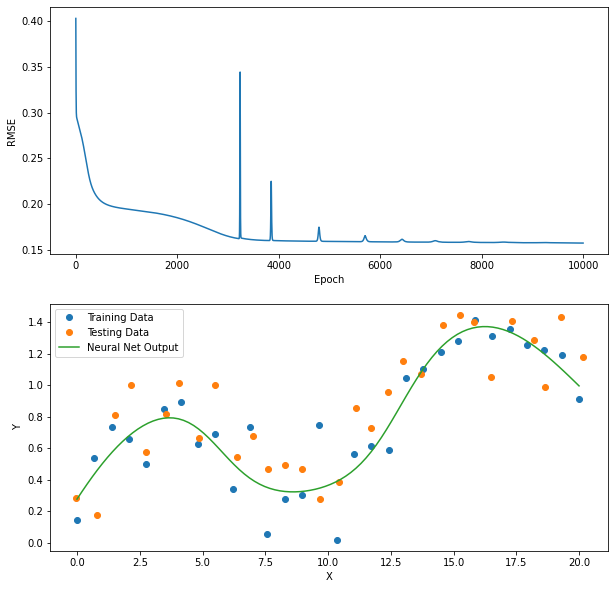

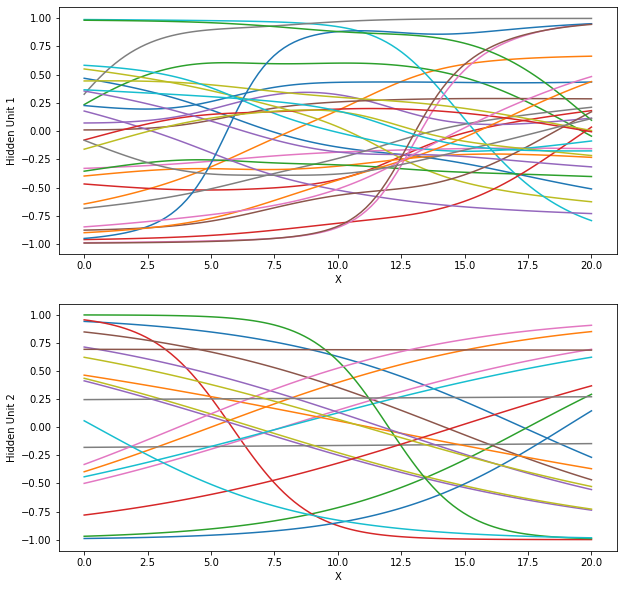

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(error_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')

plt.subplot(2, 1, 2)
plt.plot(Xtrain, Ttrain, 'o', label='Training Data')
plt.plot(Xtest, Ttest, 'o', label='Testing Data')
X_for_plot = np.linspace(0, 20, 100).reshape(-1, 1)
Y_train = use(X_for_plot, W, stand_parms)
plt.plot(X_for_plot, Y_train[-1], label='Neural Net Output')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax1.plot(X_for_plot, Y_train[-2])
plt.xlabel('X')
plt.ylabel('Hidden Unit 1')

ax2 = fig.add_subplot(2,1,2)
ax2.plot(X_for_plot, Y_train[-3])
plt.xlabel('X')
plt.ylabel('Hidden Unit 2')

In [ ]:
n_samples = 30
Xtrain = np.linspace(0., 20.0, n_samples).reshape((n_samples, 1))
Ttrain = 0.2 + 0.05 * (Xtrain) + 0.4 * np.sin(Xtrain / 2) + 0.2 * np.random.normal(size=(n_samples, 1))

Xtest = Xtrain + 0.1 * np.random.normal(size=(n_samples, 1))
Ttest = 0.2 + 0.05 * (Xtest) + 0.4 * np.sin(Xtest / 2) + 0.2 * np.random.normal(size=(n_samples, 1))

In [ ]:
n_inputs = Xtrain.shape[1]
n_hiddens = [[4],[4,4],[4,4,4],[4,4,4,4]]
n_outputs = Ttrain.shape[1]

n_epochs = 10000
learning_rate = 0.1

results=[]
plot1=[]


for i in range(len(n_hiddens)):
  W = make_weights(n_inputs, n_hiddens[i], n_outputs)

  W, stand_parms, error_trace = train_sgd(Xtrain, Ttrain, W, learning_rate, n_epochs)

  Ytrain = use(Xtrain, W, stand_parms)  
  rmse_train = rmse(Ytrain[-1], Ttrain)
  Ytest = use(Xtest, W, stand_parms)
  rmse_test = rmse(Ytest[-1], Ttest)

  plot1.append([error_trace,W])
  results.append([i+1,rmse_train,rmse_test])
  print(f'RMSE: Train {rmse_train:.2f} Test {rmse_test:.2f}')
  # print(result




RMSE: Train 0.19 Test 0.24
RMSE: Train 0.13 Test 0.23
RMSE: Train 0.13 Test 0.25
RMSE: Train 0.18 Test 0.26


In [ ]:
import pandas
df = pandas.DataFrame(results, columns=('Layers', 'RMSE Train', 'RMSE Test'))
df

,Layers,RMSE Train,RMSE Test
0,1,0.190253,0.242043
1,2,0.132628,0.232620
2,3,0.128409,0.245291
3,4,0.181744,0.263586


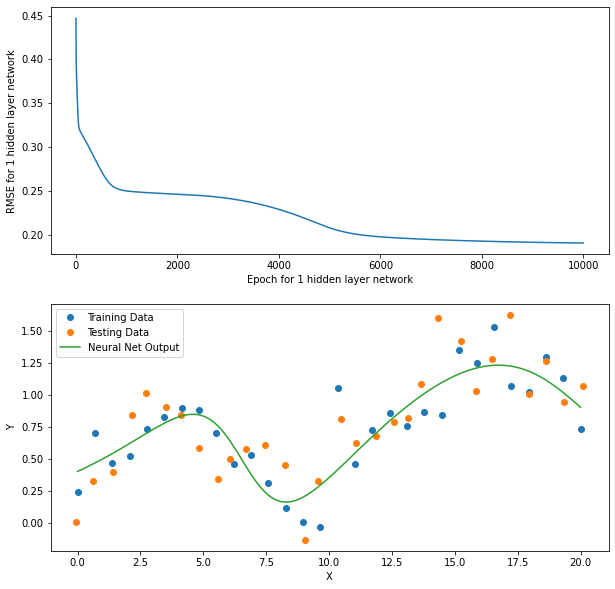

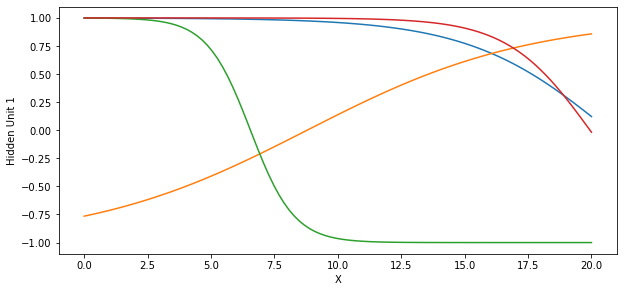

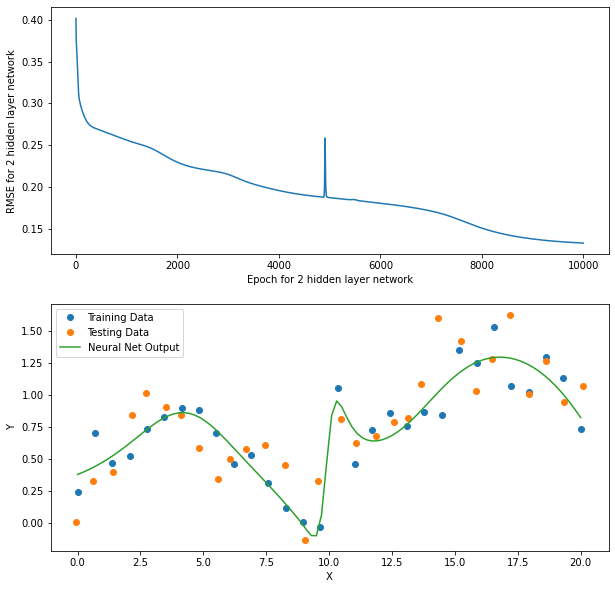

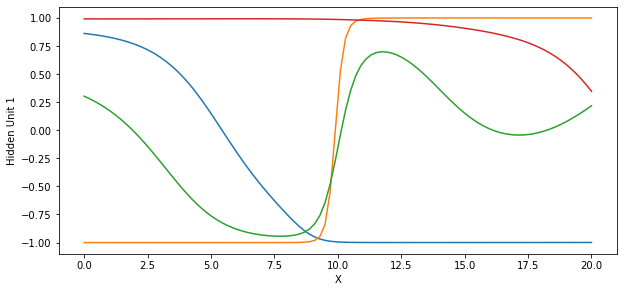

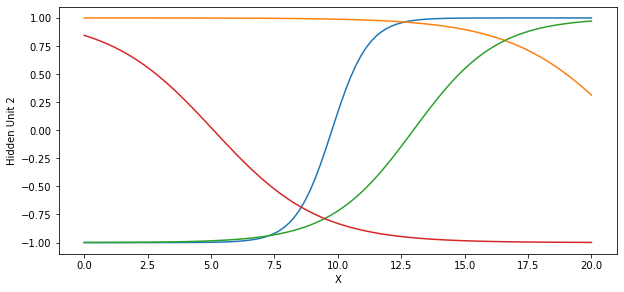

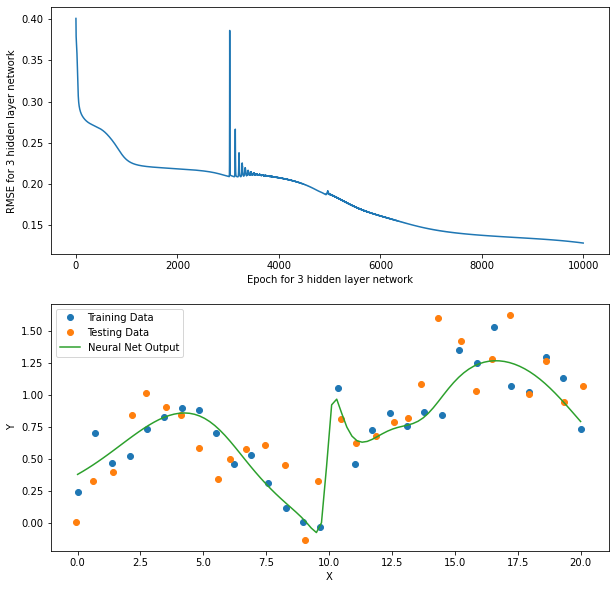

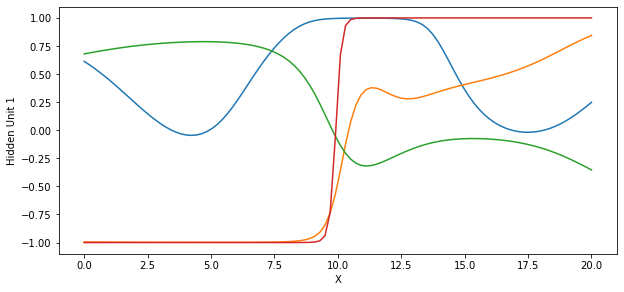

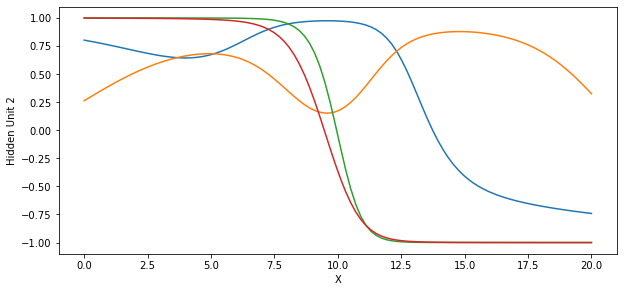

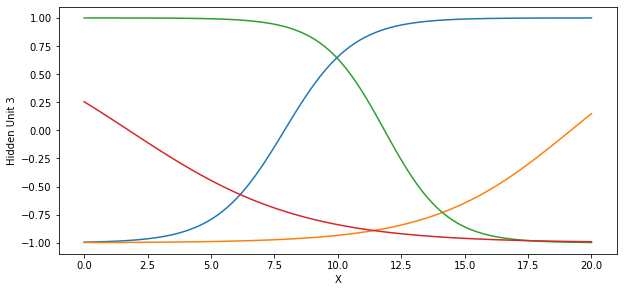

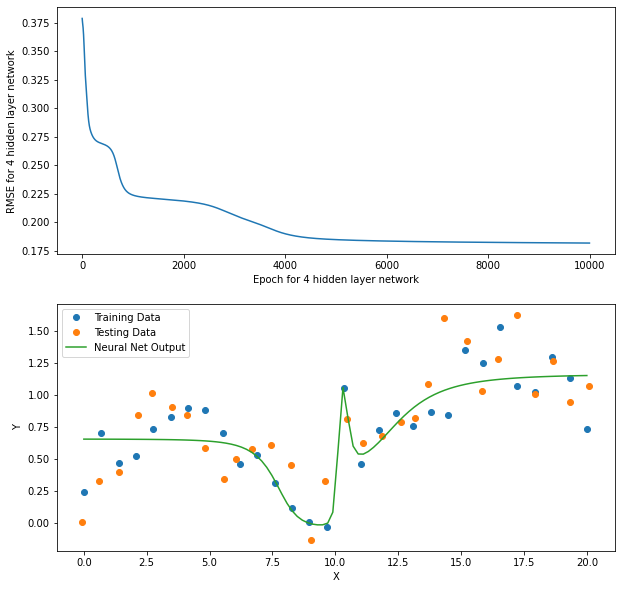

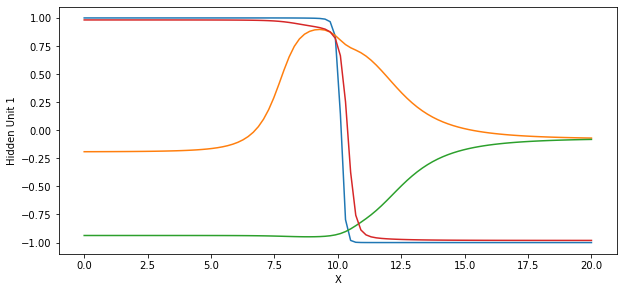

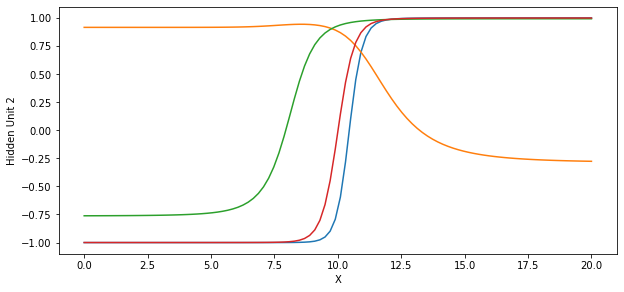

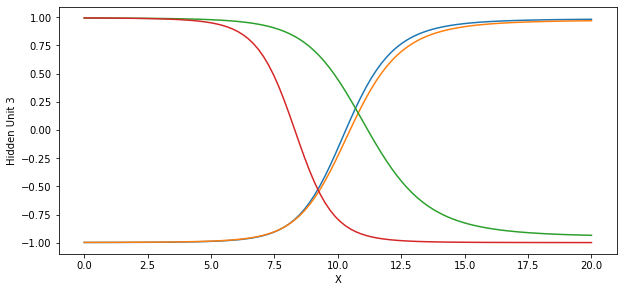

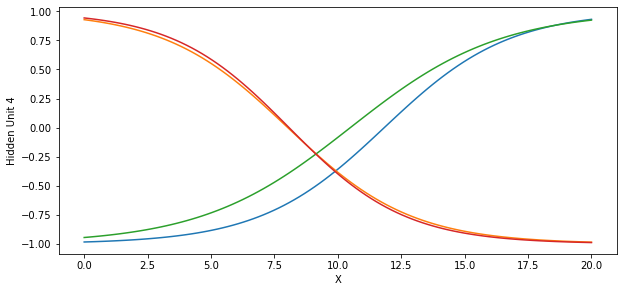

In [ ]:
for i in range(len(plot1)):
  
  plt.figure(figsize=(10, 10))
  plt.subplot(2, 1, 1)
  plt.plot(plot1[i][0])
  plt.xlabel('Epoch for '+str(i+1)+' hidden layer network')
  plt.ylabel('RMSE for '+str(i+1)+' hidden layer network')

  plt.subplot(2, 1, 2)
  plt.plot(Xtrain, Ttrain, 'o', label='Training Data')
  plt.plot(Xtest, Ttest, 'o', label='Testing Data')
  X_for_plot = np.linspace(0, 20, 100).reshape(-1, 1)
  Y_train = use(X_for_plot, plot1[i][1], stand_parms)
  t=plot1[i][1]
  plt.plot(X_for_plot,Y_train[-1], label='Neural Net Output')
  plt.legend()
  plt.xlabel('X')
  plt.ylabel('Y')

  for j in range(i+1):
    
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(211)
    ax1.plot(X_for_plot, Y_train[-1*(j+2)])
    plt.xlabel('X')
    plt.ylabel('Hidden Unit '+str(j+1))


# Observations on for loop - tanh activation function

 I have plotted graphs for each and every hidden layer of the respective
networks to see how the output from each hidden layer in every network.
I saw that the model learns pretty well just with a single hidden layer with 4 units. In most cases, the increase in the number of hidden layers has resulted in better accuracy. I observed that the RMSE error converged quickly as the number of hidden layers is increased, but it is not much significant with more than two hidden layers. In multiple hidden layer networks, the hidden units of different hidden layers have learnt similar features, suggesting that number of hidden units in some hidden layers could be minimized. I could see that the shape of the trajectory of the output curve is mostly determined in the first layer and the next layers are making slight changes to the curve to fit more data, this could be because the data is not so complex. Lastly, test accuracy is not as good as train accuracy.





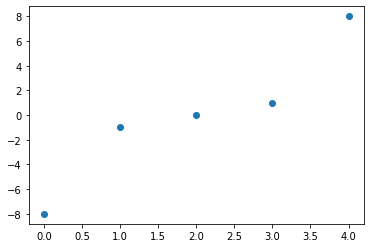

In [ ]:
X = np.arange(5).reshape(-1, 1)
T = (X - 2) ** 3
plt.plot(X, T, 'o');

In [ ]:
stand_parms = calc_standardize_parameters(X, T)
stand_parms

{'Tmeans': array([0.]),
 'Tstds': array([5.09901951]),
 'Xmeans': array([2.]),
 'Xstds': array([1.41421356])}

In [ ]:
np.random.seed(42)  # Set the random number generator seed so same weight values are generated each time.
n_inputs = 1
n_hiddens_list = [2, 3]
n_outputs = 1
Ws = make_weights(n_inputs, n_hiddens_list, n_outputs)
Ws

[array([[-0.17742707,  0.63740628],
        [ 0.32808898,  0.13952417]]),
 array([[-0.39719546, -0.39722331, -0.51028109],
        [ 0.42282379,  0.11675756,  0.24026152],
        [-0.55358134,  0.54260516,  0.3838717 ]]),
 array([[-0.28766089],
        [-0.31817503],
        [-0.31659549],
        [-0.19575776]])]

In [ ]:
Xst = standardize_X(X, stand_parms)
Xst

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

In [ ]:
forward(Xst, Ws)

[array([[-0.56586221,  0.41371847],
        [-0.38798095,  0.49203951],
        [-0.17558839,  0.56313093],
        [ 0.05451278,  0.6267617 ],
        [ 0.27896633,  0.68300402]]),
 array([[-0.69907152, -0.23436786, -0.45216727],
        [-0.68241869, -0.17375875, -0.39238667],
        [-0.65452655, -0.11169878, -0.32416858],
        [-0.61759623, -0.05073081, -0.25110112],
        [-0.57659057,  0.00594955, -0.17911703]]),
 array([[ 0.09748127],
        [ 0.06129167],
        [ 0.01941496],
        [-0.02594105],
        [-0.07102422]])]

In [ ]:
Tst = standardize_T(T, stand_parms)
Tst

array([[-1.56892908],
       [-0.19611614],
       [ 0.        ],
       [ 0.19611614],
       [ 1.56892908]])

In [ ]:
backward(Xst, Tst, Ws)

[array([[ 0.02036822, -0.01636089],
        [ 0.12862245,  0.0892945 ]]),
 array([[0.01472725, 0.00112042, 0.00918263],
        [0.05411053, 0.09250499, 0.05057852],
        [0.02592358, 0.02999365, 0.02150022]]),
 array([[ 0.01624453],
        [-0.05411685],
        [-0.08718807],
        [-0.10225819]])]

In [ ]:
use(X, Ws, stand_parms)

[array([[-0.56586221,  0.41371847],
        [-0.38798095,  0.49203951],
        [-0.17558839,  0.56313093],
        [ 0.05451278,  0.6267617 ],
        [ 0.27896633,  0.68300402]]),
 array([[-0.69907152, -0.23436786, -0.45216727],
        [-0.68241869, -0.17375875, -0.39238667],
        [-0.65452655, -0.11169878, -0.32416858],
        [-0.61759623, -0.05073081, -0.25110112],
        [-0.57659057,  0.00594955, -0.17911703]]),
 array([[ 0.49705891],
        [ 0.31252744],
        [ 0.09899728],
        [-0.13227391],
        [-0.36215388]])]

In [ ]:
import pandas
df = pandas.DataFrame(results, columns=('Layers', 'RMSE Train', 'RMSE Test'))
df

,Layers,RMSE Train,RMSE Test
0,1,0.190253,0.242043
1,2,0.132628,0.232620
2,3,0.128409,0.245291
3,4,0.181744,0.263586


## Required Part Two

Copy and paste here the following functions and rename them as shown.  These new versions will use the asymmetric sigmoid activation function instead of the symmetric one that used `tanh`.  Repeat the above experiments with the one-dimensional data.

* `forward` becomes `forward_asig`
* `backward` becomes `backward_asig`
* `train_sgd` becomes `train_sgd_asig`
* `use` becomes `use_asig`

In [ ]:
def asig(X):
  return 1/(1+np.exp(-X))

In [ ]:
def grad_asig(X):
  return X*(1-X)

In [ ]:
def forward_asig(Xst, Ws):
    # Calculate the outputs, Z, of all hidden units, given all input samples in X.
    output_list=[]
    for W in Ws:
      Z = asig(add_ones(Xst) @ W)
      output_list.append(Z);
      Xst=Z
    output_list.pop()
    # Calculate the outputs, Y, of all output units, given all outputs of the hidden units.
    Yst = add_ones(output_list[-1]) @ Ws[-1]
    output_list.append(Yst)
    return output_list


In [ ]:
def backward_asig(Xst, Tst, Ws):
    n_samples = Xst.shape[0]
    n_outputs = Tst.shape[1]
    # Calculate the outputs of both layers.
    outs= forward_asig(Xst, Ws)
    gradients=[]
    # Calculate the delta value for the output layer. Divide by n_samples * n_outputs
    # because we are calculating the gradient of the mean sqauared error with respect to weights.
    delta = -(Tst -  outs[-1]) /  (n_samples * n_outputs)
    # The gradient of the mean squared error with respect to the output layer weights W.
    gradient_W = add_ones(outs[-2]).T @ delta
    gradients.append(gradient_W)
    # Back-propagate the delta value from the output layer, through the output layer weights,
    # to the hidden units.  Multiply the result by the derivative of the hidden units'
    # activation function, tanh
    for i in range(len(Ws)-2):
      delta = (delta @ Ws[-1*(i+1)][1:, :].T) *grad_asig(outs[-1*(i+2)])
    # The gradient of the mean squared error with respect to the hidden layer weights, V.
      gradient_V = add_ones(outs[-1*(i+3)]).T @ delta
      gradients.append(gradient_V)

    delta = (delta @ Ws[1][1:, :].T) * grad_asig(outs[0])
    gradient_V = add_ones(Xst).T @ delta
    gradients.append(gradient_V)
    # Return both gradients.  Each should be the same shape as the respective weight matrices.
    gradients.reverse()
    return gradients

In [ ]:
def train_sgd_asig(X, T, Ws, learning_rate, n_epochs):
    # Store standardization parameters in dictionary stand_parms.
    stand_parms = calc_standardize_parameters(X, T)
    # Standardize X and T.
    Xst = standardize_X(X, stand_parms)
    Tst = standardize_T(T, stand_parms)

    error_trace = []

    # Update weights for n_epochs passes through the training data
    for epoch in range(n_epochs):

        # Calculate the gradients of the mean squared error with respect to each weight matrix.
        gradient_list = backward_asig(Xst, Tst, Ws)

        
        # Update the values in each weight matrix using SGD.
        for i in range(len(gradient_list)):
          Ws[i] -= learning_rate * gradient_list[i]
          # W -= learning_rate * gradient_W

        # Calculate the outputs of both layers given the current weight values.
        outputs = forward_asig(Xst,Ws)
        Y = unstandardize_T(outputs[-1], stand_parms)
        error_trace.append(rmse(Y, T))

    return Ws, stand_parms, error_trace

In [ ]:
def use_asig(X, Ws, stand_parms):
    # Standardize inputs X
    Xst = standardize_X(X, stand_parms)
    # Calculate outputs of each layer.
    outs = forward_asig(Xst, Ws)
    Yst=outs[-1]
    outs.pop()
    Yst=unstandardize_T(Yst, stand_parms)
    outs.append(Yst)
    # Unstandardize output of output layer
    return outs
    

In [ ]:
def rmse(Y, T):
    error = T - Y
    return np.sqrt(np.mean(error ** 2))

In [ ]:
n_samples = 30

Xtrain = np.linspace(0., 20.0, n_samples).reshape((n_samples, 1))
Ttrain = 0.2 + 0.05 * (Xtrain) + 0.4 * np.sin(Xtrain / 2) + 0.2 * np.random.normal(size=(n_samples, 1))

Xtest = Xtrain + 0.1 * np.random.normal(size=(n_samples, 1))
Ttest = 0.2 + 0.05 * (Xtest) + 0.4 * np.sin(Xtest / 2) + 0.2 * np.random.normal(size=(n_samples, 1))

In [ ]:
n_inputs = Xtrain.shape[1]
n_hiddens = [20,30]
n_outputs = Ttrain.shape[1]

n_epochs = 10000
learning_rate = 0.1

W = make_weights(n_inputs, n_hiddens, n_outputs)

W, stand_parms, error_trace = train_sgd_asig(Xtrain, Ttrain, W, learning_rate, n_epochs)

Ytrain = use_asig(Xtrain, W, stand_parms)  
rmse_train = rmse(Ytrain[-1], Ttrain)
Ytest = use_asig(Xtest, W, stand_parms)
rmse_test = rmse(Ytest[-1], Ttest)

print(f'RMSE: Train {rmse_train:.2f} Test {rmse_test:.2f}')


RMSE: Train 0.24 Test 0.23


Text(0, 0.5, 'Hidden Unit 2')

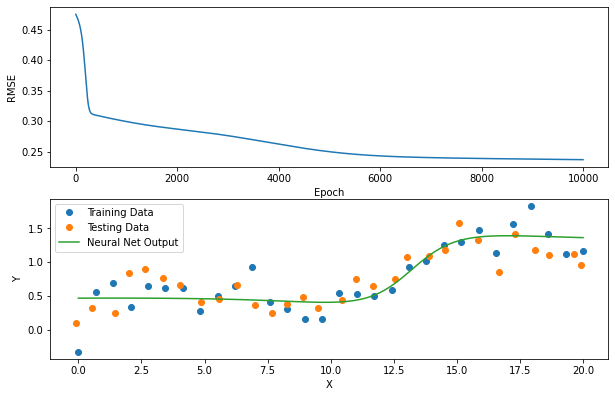

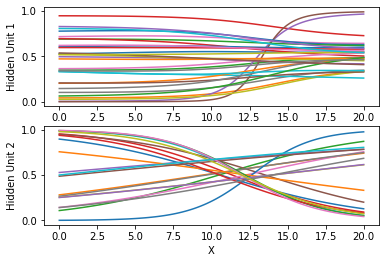

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.plot(error_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')

plt.subplot(3, 1, 2)
plt.plot(Xtrain, Ttrain, 'o', label='Training Data')
plt.plot(Xtest, Ttest, 'o', label='Testing Data')
X_for_plot = np.linspace(0, 20, 100).reshape(-1, 1)
Y_train = use_asig(X_for_plot, W, stand_parms)
plt.plot(X_for_plot, Y_train[-1], label='Neural Net Output')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

fig = plt.figure()
ax1 = fig.add_subplot(211)
#plt.subplot(3, 1, 3)
ax1.plot(X_for_plot, Y_train[-2])
plt.xlabel('X')
plt.ylabel('Hidden Unit 1')

ax2 = fig.add_subplot(212)
#plt.subplot(3, 1, 3)
ax2.plot(X_for_plot, Y_train[-3])
plt.xlabel('X')
plt.ylabel('Hidden Unit 2')

In [ ]:
n_samples = 30

Xtrain = np.linspace(0., 20.0, n_samples).reshape((n_samples, 1))
Ttrain = 0.2 + 0.05 * (Xtrain) + 0.4 * np.sin(Xtrain / 2) + 0.2 * np.random.normal(size=(n_samples, 1))

Xtest = Xtrain + 0.1 * np.random.normal(size=(n_samples, 1))
Ttest = 0.2 + 0.05 * (Xtest) + 0.4 * np.sin(Xtest / 2) + 0.2 * np.random.normal(size=(n_samples, 1))

In [ ]:
n_inputs = Xtrain.shape[1]
n_hiddens = [[4],[4,4],[4,4,4],[4,4,4,4]]
n_outputs = Ttrain.shape[1]

n_epochs = 10000
learning_rate = 0.1

results=[]
plot1=[]


for i in range(len(n_hiddens)):
  W = make_weights(n_inputs, n_hiddens[i], n_outputs)

  W, stand_parms, error_trace = train_sgd_asig(Xtrain, Ttrain, W, learning_rate, n_epochs)

  Ytrain = use_asig(Xtrain, W, stand_parms)  
  rmse_train = rmse(Ytrain[-1], Ttrain)
  Ytest = use_asig(Xtest, W, stand_parms)
  rmse_test = rmse(Ytest[-1], Ttest)
  plot1.append([error_trace,W])
  results.append([i+1,rmse_train,rmse_test])
  print(f'RMSE: Train {rmse_train:.2f} Test {rmse_test:.2f}')
  # print(result




RMSE: Train 0.24 Test 0.22
RMSE: Train 0.24 Test 0.23
RMSE: Train 0.28 Test 0.25
RMSE: Train 0.41 Test 0.43


In [ ]:
import pandas
df = pandas.DataFrame(results, columns=('Layers', 'RMSE Train', 'RMSE Test'))
df

,Layers,RMSE Train,RMSE Test
0,1,0.235539,0.222350
1,2,0.240724,0.229703
2,3,0.284065,0.253512
3,4,0.413608,0.429769


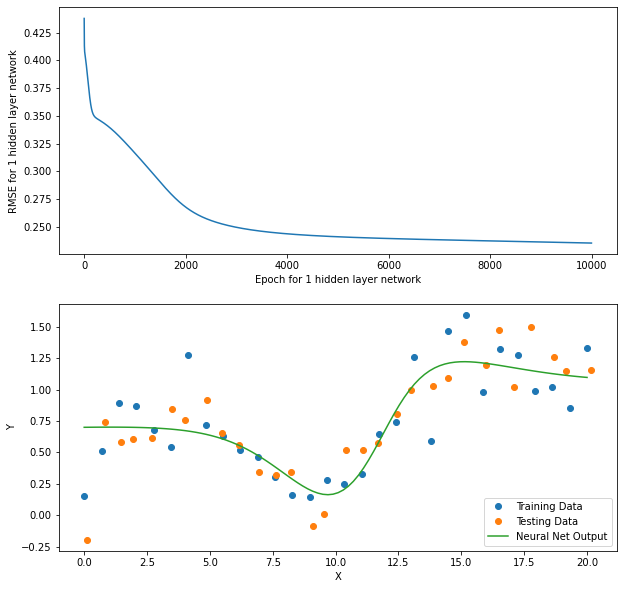

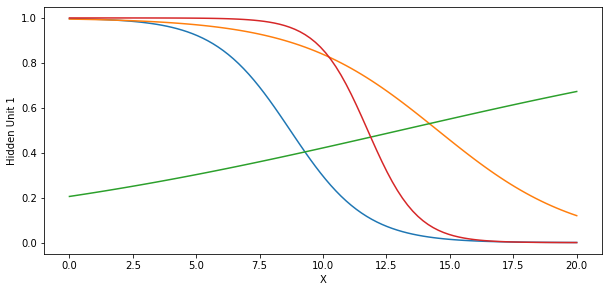

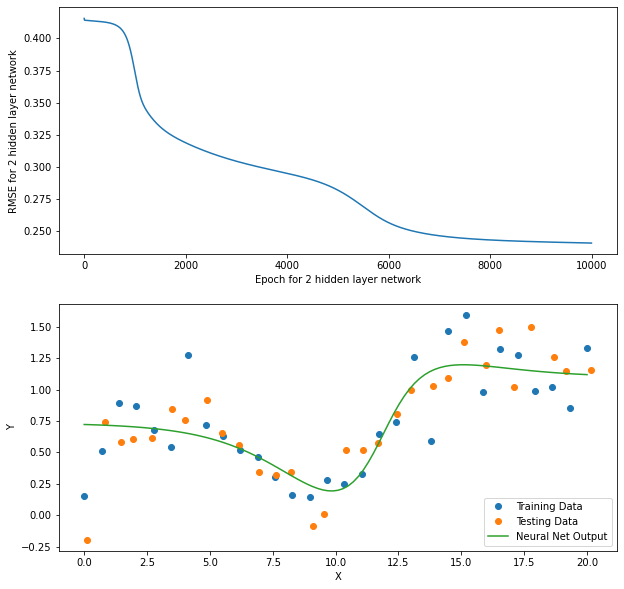

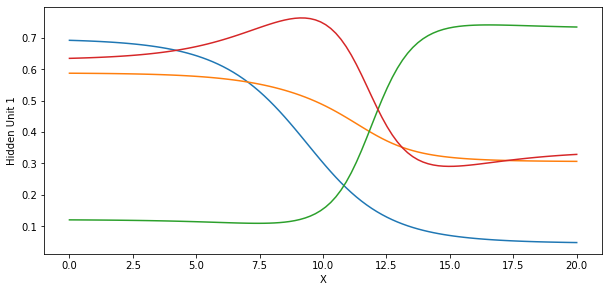

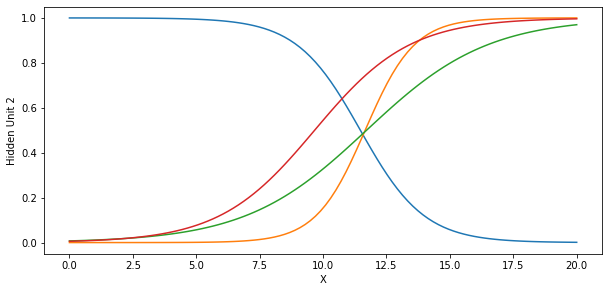

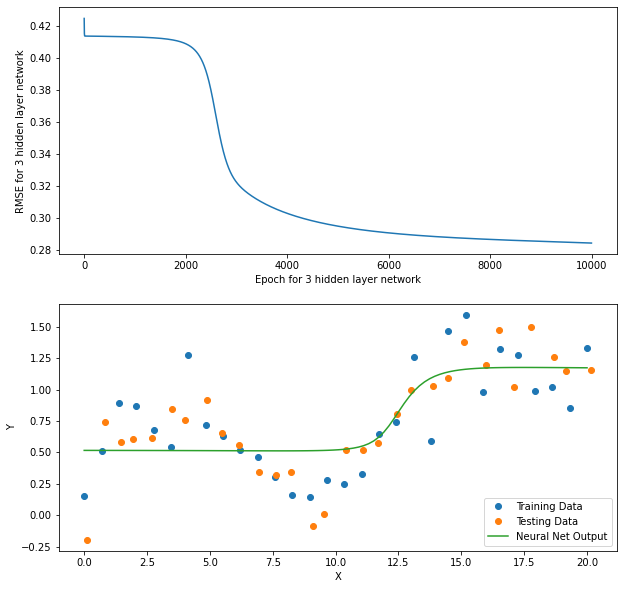

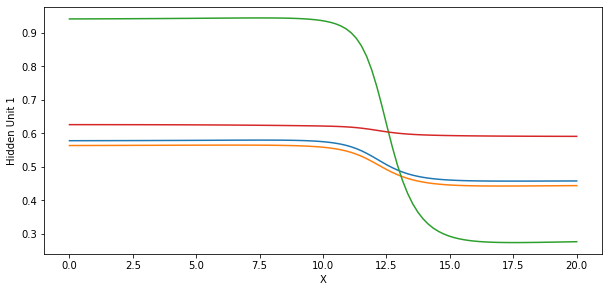

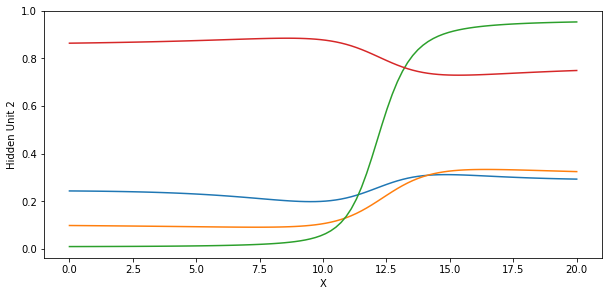

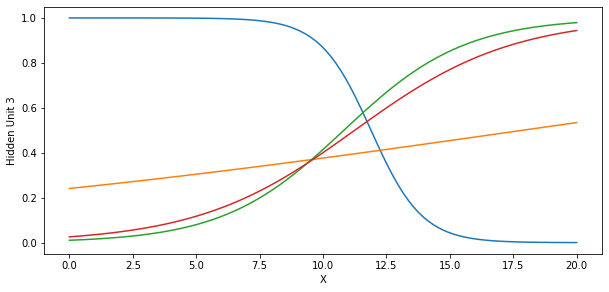

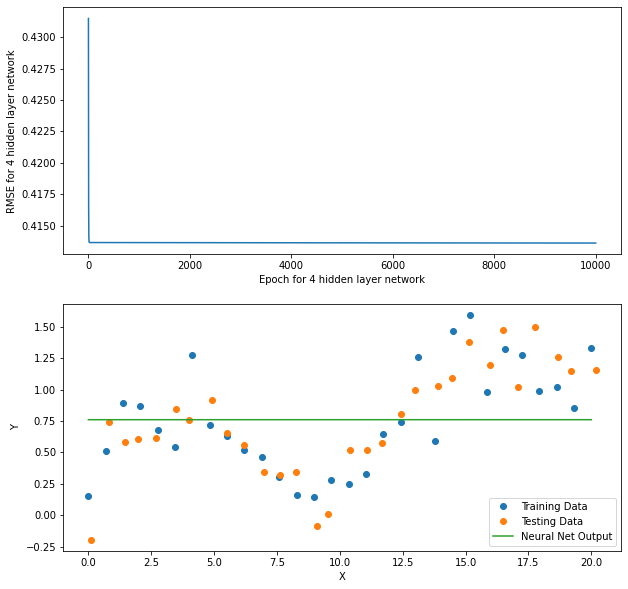

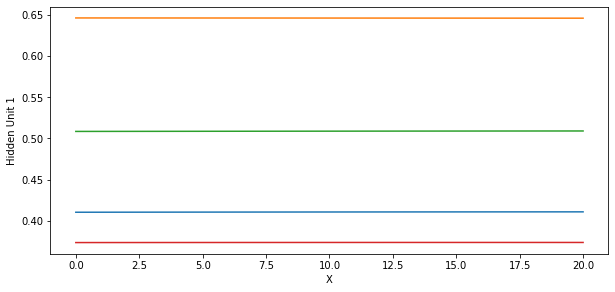

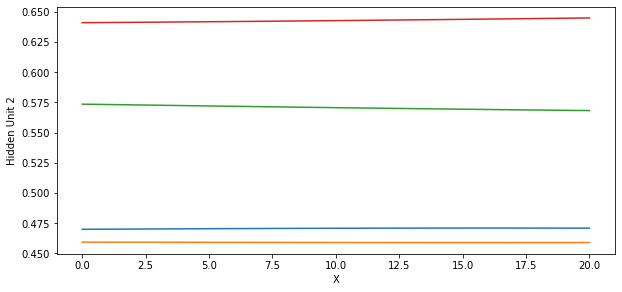

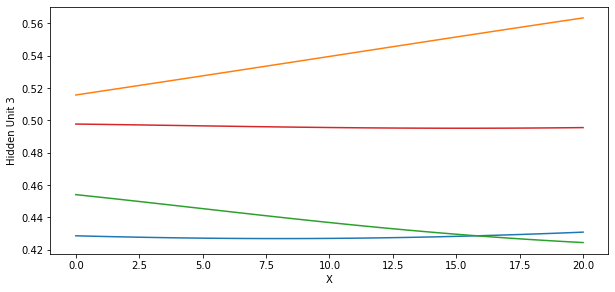

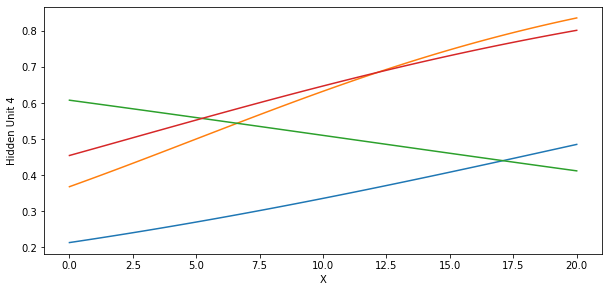

In [ ]:
for i in range(len(plot1)):
  
  plt.figure(figsize=(10, 10))
  plt.subplot(2, 1, 1)
  plt.plot(plot1[i][0])
  plt.xlabel('Epoch for '+str(i+1)+' hidden layer network')
  plt.ylabel('RMSE for '+str(i+1)+' hidden layer network')

  plt.subplot(2, 1, 2)
  plt.plot(Xtrain, Ttrain, 'o', label='Training Data')
  plt.plot(Xtest, Ttest, 'o', label='Testing Data')
  X_for_plot = np.linspace(0, 20, 100).reshape(-1, 1)
  Y_train = use_asig(X_for_plot, plot1[i][1], stand_parms)
  t=plot1[i][1]
  plt.plot(X_for_plot,Y_train[-1], label='Neural Net Output')
  plt.legend()
  plt.xlabel('X')
  plt.ylabel('Y')

  for j in range(i+1):
    
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(211)
    ax1.plot(X_for_plot, Y_train[-1*(j+2)])
    plt.xlabel('X')
    plt.ylabel('Hidden Unit '+str(j+1))


# Observations on for loop- sigmoid activation function

Sigmoid function seems to perfomr better at a higher learning rate. As the number of hidden layers is increased in the network sigmoid perfoms worse with the given learning rate of 0.1. Also, increase in the learning rate gives better accuracy but the number hidden layers does not seem to increase the accuracy. The RMSE error converges within 10000 epochs for the network with 1 hidden layer whereas, as the number of hidden layers is increased the error is not converged properly, suggesting that it requires more number of epochs.
For the network with 4 hidden layers the hidden layer ouputs become parallel to the x-axis i.e gradient zero resulting in no change in the weights, this happens for small values in sigmoid.

# Observations on Tanh vs Sigmoid



*   Sigmoid function seems to need a higher learnig rate than tanh to give better accuracy.
*   Accuracy increases with more number of hidden layers in tanh whereas it decreases or stays the same in sigmoid for the given test paramaters.
*   As the nummber of hidden layers is increased the tanh requires lesser epochs, whereas sigmoid seems to require more number of epochs.

*   Comparing the output graphs from tanh and sigmoid, it can be seen that both of them are sensitive at the midpoint of the data.

*   Sigmoid does not seems to fit the data as good as tanh. This could be because tanh gives values between -1 to 1 whereas sigmoid gives values only between 0 to 1.

*   The hidden units in the sigmoid seem to learn alomst the same features ( also happens in tanh but not as much) in the the network with more hidden layers. 

*   Overall, tahh performs much better than sigmoid.





# Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A2grader.tar](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A2grader.tar) and extract `A2grader.py` from it. Run the code in the following cell to demonstrate an example grading session.  The remaining 40 points will be based on other testing and the results you obtain and your discussions. 

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A2.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [ ]:
%run -i A2grader.py

ERROR:root:File `'A2grader.py'` not found.


# Check-In

Do not include this section in your notebook.

Name your notebook ```Lastname-A2.ipynb```.  So, for me it would be ```Anderson-A2.ipynb```.  Submit the file using the ```Assignment 2``` link on [Canvas](https://colostate.instructure.com/courses/109894).

# Extra Credit

Apply your multilayer neural network code to a regression problem using data that you choose 
from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php). Pick a dataset that
is listed as being appropriate for regression.